<a href="https://colab.research.google.com/github/johnkansas/dacon_start_tutorial_test/blob/main/dacon_1_9_level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 다운로드
--- 
아래 셀을 실행시켜 데이터를 colab에 불러옵니다.  
셀 실행은 Ctrl + Enter 를 이용해 실행 시킬 수 있습니다. 

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-01-11 10:53:20--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-01-11 10:53:20--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.113, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mfkm5cjet0na4di7c8mfgd39kt0r81jv/1641898350000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download [following]
--2022-01-11 10:53:20--  https://doc-0c-10-docs.googleusercontent.com/docs/secur

# 라이브러리 불러오기
---

In [2]:
# 라이브러리 불러오기
# import [라이브러리] as [사용할 이름]
# 판다스 , 넘파이

import pandas as pd
import numpy as np

# 파일 불러오기
---
파이썬에서 데이터 파일(csv 파일)을 불러오기 위해서는 pandas 라이브러리를 이용해야 합니다.    
pandas 라이브러리를 먼저 import 해주고, pandas의 read_csv 메서드를 이용해 파일을 불러올 수 있습니다.

In [3]:
#import pandas as pd
#data = pd.read_csv('파일경로/파일이름.csv')

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# EDA

In [ ]:
# 데이터 상위 5개 행 확인하기
#train
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
#test
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
# 행열 갯수 관찰하기 - shape
print('train의 행열 갯수 :', train.shape)
print('test의 행열 갯수 :', test.shape)

train의 행열 갯수 : (1459, 11)
test의 행열 갯수 : (715, 10)


In [ ]:
# 결측치 확인하기
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [ ]:
#수치데이터 특성 보기

train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [4]:
# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

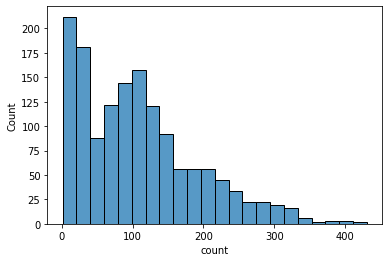

In [23]:
sns.histplot(train['count'])#열이름 값이 count라서 x축 이름을 바꿀수가 없다.
# print(train['count'])
# train
# penguins = sns.load_dataset("penguins")
# penguins

In [24]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


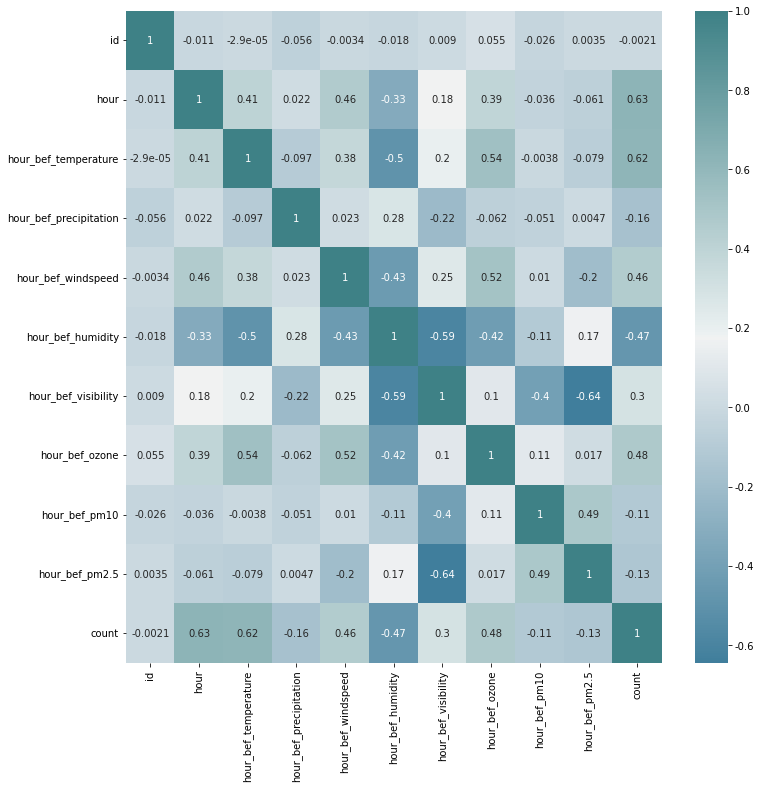

In [37]:
import seaborn as sns
plt.figure(figsize = (12,12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 200, as_cmap=True)
sns.heatmap(train.corr(),annot = True,cmap=cmap)
#anot: wright the data value

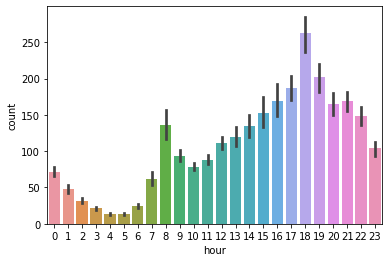

In [38]:
sns.barplot(x = 'hour', y = 'count', data = train)
#train에서 열들을 비교한 bar 표

# 데이터 전처리

## 결측치 처리하기

In [ ]:
# 결측치 데이터 제거
train.dropna(inplace = True)

In [ ]:
# 결측치 특정 상수 값으로 대체
train.fillna(0,inplace = True)

In [ ]:
# 결측치 해당 변수 평균 값으로 대체
train.fillna(train.mean(),inplace = True)
test.fillna(train.mean(),inplace = True)

In [ ]:
# 결측치 보간법으로 채우기
train.interpolate(inplace=True)


## 연속형 변수 변환

In [ ]:
# 연속형 변수 시각화.
for col in train.columns:
  plt.figure(figsize = (4,4))
  plt.title(col)
  sns.histplot(train[col])
  plt.show()


In [ ]:
# 데이터 분포가 불균형한 경우  Min-Max Normalization

#train['hour_bef_pm2.5'] = np.log1p(train['hour_bef_pm2.5'])
#train['hour_bef_pm10'] = np.log1p(train['hour_bef_pm10'])

test['hour_bef_pm2.5'] = np.log1p(test['hour_bef_pm2.5'])
test['hour_bef_pm10'] = np.log1p(test['hour_bef_pm10'])

sns.histplot(train['hour_bef_pm2.5'])


## 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
RandomForestRegressor()

In [ ]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [ ]:
gs = gridsearchchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)
#we use GridSearchCV to automate the tuning of hyperparameters.
#데이터 교차검증 3개로

In [ ]:
gs.fit(X_train, y_train)

## 제출 파일 생성

In [ ]:
submission = pd.read_csv('data/submission.csv')

In [ ]:
pred = gs.predict(X_test)

In [ ]:
submission['count']  = pred

In [ ]:
submission.to_csv('gridsearch.csv', index = False)

In [ ]:
from google.colab import files
files.download('gridsearch.csv')